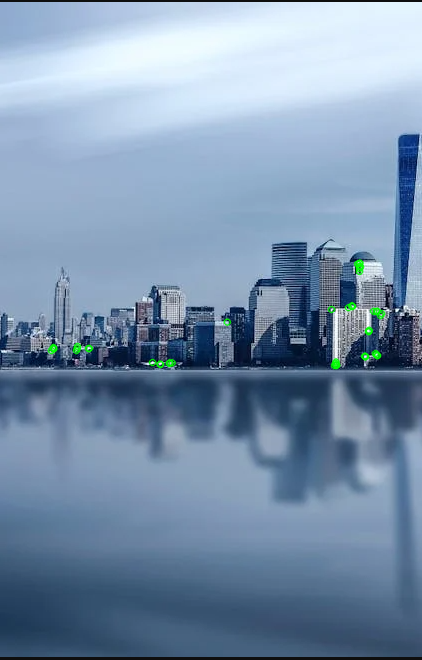

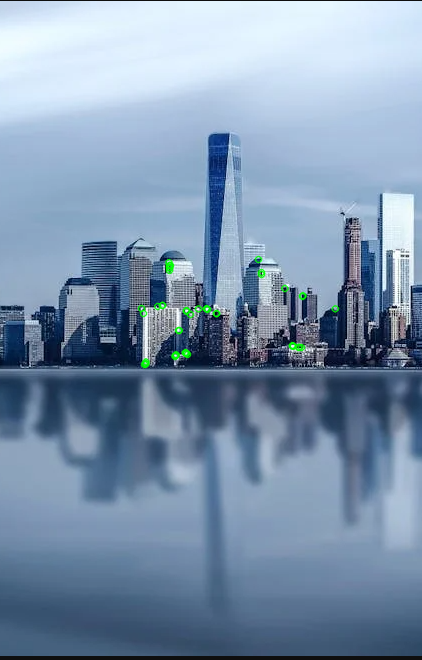

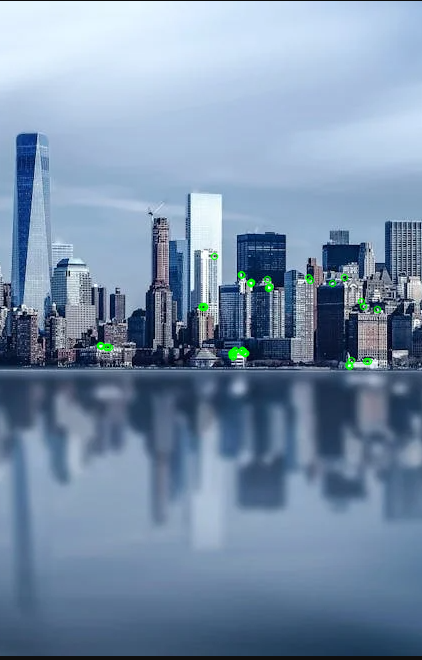

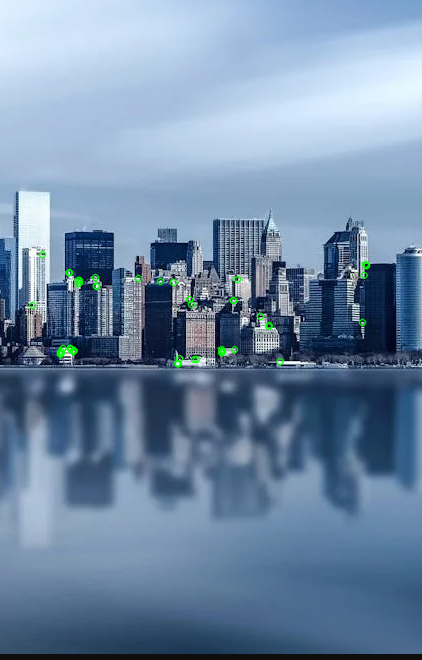

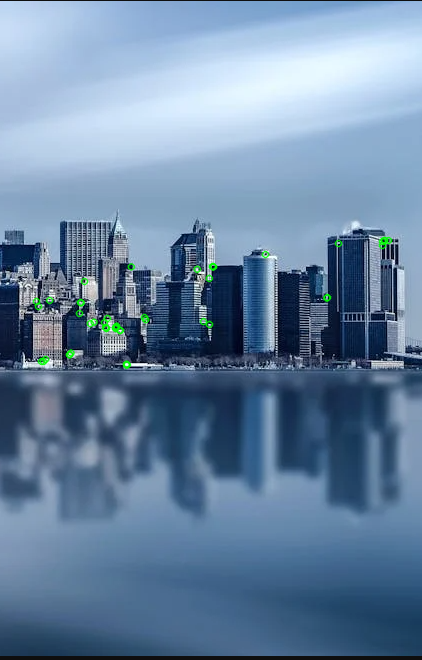

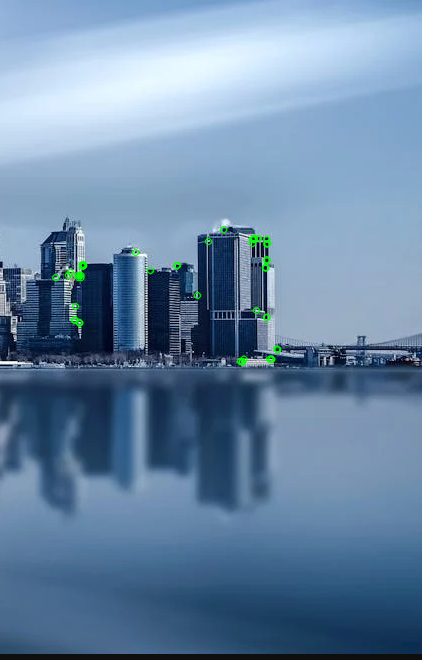

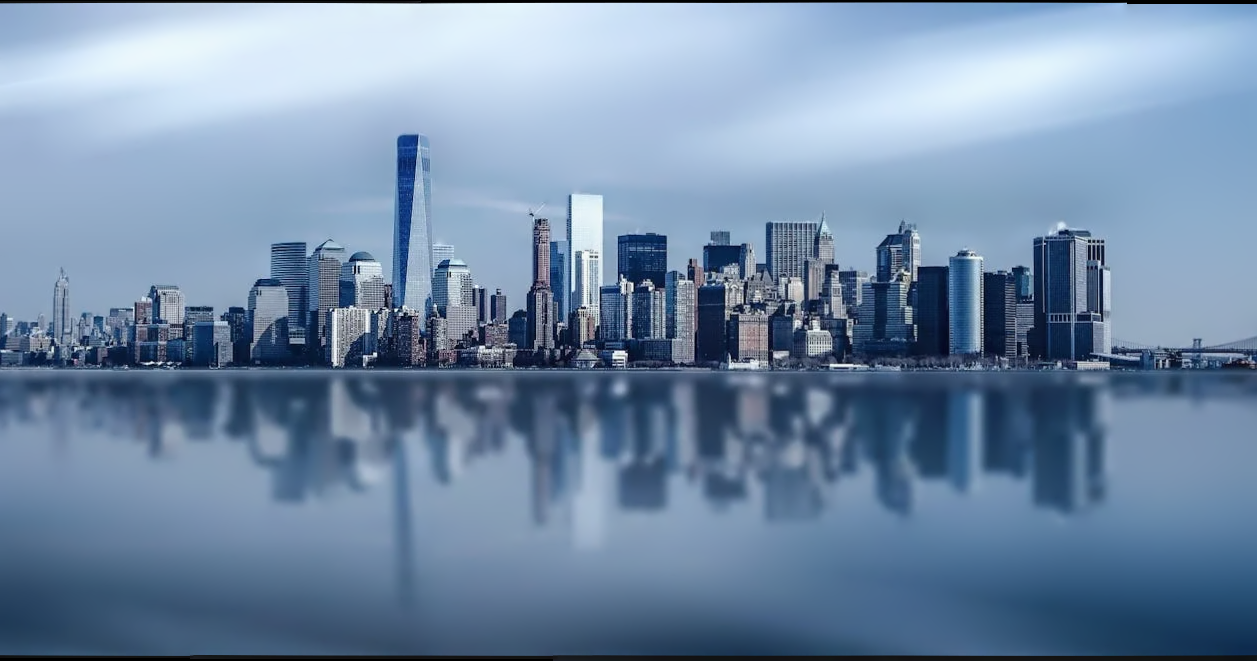

In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

def detect_and_stitch(image_folder):
    """
    Detects keypoints in images, displays them, and stitches the images into a panorama.

    Args:
        image_folder (str): The path to the folder containing the images to stitch.

    Returns:
        numpy.ndarray: The stitched panorama image, or None if stitching fails.
    """

    images = []  # List to store the loaded images

    # Loop through all files in the specified folder
    for filename in sorted(os.listdir(image_folder)):
        # Check if the file is an image (ends with .jpg, .png, .jpeg)
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder, filename)  # Create the full image path

            # Read the image from the file
            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Error reading image: {filename}")
                return None  # Return None if there's an error loading an image

            # Convert the image to grayscale for keypoint detection
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # --- Keypoint Detection with ORB (Optimized) ---
            # Create an ORB (Oriented FAST and Rotated BRIEF) keypoint detector
            orb = cv2.ORB_create(nfeatures=100)  # Limit to 100 features to improve speed

            # Detect keypoints and compute descriptors (feature vectors)
            keypoints, descriptors = orb.detectAndCompute(gray, None)

            # --- Filter Keypoints Based on Response ---
            # Sort keypoints based on their 'response' (strength) in descending order
            keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)

            # Keep only the top 50% strongest keypoints
            num_to_keep = int(len(keypoints) * 0.5)
            keypoints = keypoints[:num_to_keep]

            # --- Draw Keypoints (Smaller circles) ---
            # Draw the detected keypoints on the original image
            img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

            # Display the image with keypoints
            cv2_imshow(img_with_keypoints)
            cv2.waitKey(0)  # Wait for a key press
            cv2.destroyAllWindows()  # Close the image window

            # Add the loaded image to the list of images
            images.append(img)

    # Check if we have enough images to create a panorama
    if len(images) < 2:
        print("Need at least 2 images to create a panorama.")
        return None  # Return None if there aren't enough images

    # Create a Stitcher object
    stitcher = cv2.Stitcher_create()

    # Stitch the images together
    status, panorama = stitcher.stitch(images)

    # Check if stitching was successful
    if status != cv2.Stitcher_OK:
        print(f"Stitching failed: {status}")
        return None  # Return None if stitching failed

    # Return the stitched panorama image
    return panorama


# --- Main part of the code ---

image_folder = "folder2"  # Replace with your image folder name
panorama = detect_and_stitch(image_folder)

# Check if panorama creation was successful
if panorama is not None:
    # Save the panorama to a file
    cv2.imwrite("panorama.jpg", panorama)

    # Display the panorama
    cv2_imshow(panorama)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Panorama creation failed.")